In [29]:
import pandas as pd
import torch
import xarray as xr
import os
import data.valid_crd as valid_crd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [ ]:
clim = 'access_cm2'
cmip6_dir = '/pscratch/sd/k/kas7897/cmip6'
ds_sample = xr.open_dataset(f"{cmip6_dir}/{clim}/historical/precipitation/clipped_US.nc")

crd = valid_crd.valid_lat_lon(ds_sample, var_name='pr', shapefile_path=None, attrList=None)




params = torch.load('outputs/jobs_lr1e-4/access_cm2-livneh/QM_MLP_layers4_degree1_quantile0.5_scalejulian-day/' \
'678156f3_1979_2000/2001_2014/ep150/params.pt', map_location='cpu')

/tmp/ipykernel_557312/1559160631.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  params = torch.load('outputs/jobs_lr1e-4/access_cm2-livneh/QM_MLP_layers4_degree1_quant

In [20]:
## take mean across time (second dimension) in params

params_space = params.mean(axis=1)
lats, lons = zip(*crd)

In [24]:
params_space.shape

(346, 2)

/tmp/ipykernel_557312/1379999671.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


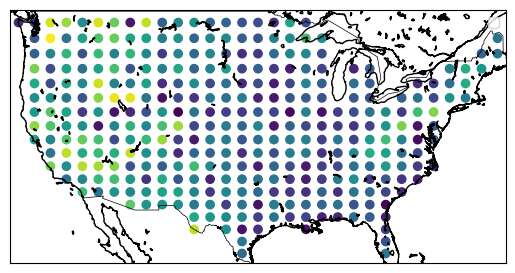

In [28]:
m = Basemap(projection="merc",
                        llcrnrlat=min(lats) - 1, urcrnrlat=max(lats) + 1,
                        llcrnrlon=min(lons) - 1, urcrnrlon=max(lons) + 1,
                        resolution="i")
m.drawcoastlines()
m.drawcountries()
x, y = m(lons, lats)
last_scatter = m.scatter(x, y, c=params_space[:,0])
plt.legend()
plt.show()